In [1]:
import tensorflow as tf
import random
import torch
import torchvision

import numpy as np
import pandas as pd	

import matplotlib.pyplot as plt
import seaborn as sns

2024-09-26 08:02:19.997530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 08:02:20.014042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 08:02:20.018930: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 08:02:20.032950: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-26 08:02:21.042279: W tensorflow/compiler/tf2

In [2]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

In [3]:
x_train = trainset.data      
y_train = trainset.targets   

x_test = testset.data        
y_test = testset.targets    


In [4]:
y_test

tensor([7, 2, 1,  ..., 4, 5, 6])

<h3> EDA on MNIST Data <h3>

In [5]:
mnist_train = pd.DataFrame(x_train.reshape(x_train.shape[0], 
                                           x_train.shape[1] * x_train.shape[2]))

mnist_test = pd.DataFrame(x_test.reshape(x_test.shape[0], 
                                           x_test.shape[1] * x_test.shape[2]))


colnames = ['Pixel'+str(i) for i in range(1,785)]

mnist_train.columns = colnames
mnist_test.columns = colnames

mnist_train['label'] = y_train
mnist_test['label'] = y_test


mnist_train.head()

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,...,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [6]:
mnist_test.head()

,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,Pixel9,Pixel10,...,Pixel776,Pixel777,Pixel778,Pixel779,Pixel780,Pixel781,Pixel782,Pixel783,Pixel784,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [7]:
mnist_train.isnull().values.sum()

0

/tmp/ipykernel_5770/3083259901.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=mnist_train, palette="Set3").set(


[Text(0.5, 1.0, 'Label distribution in Training Data')]

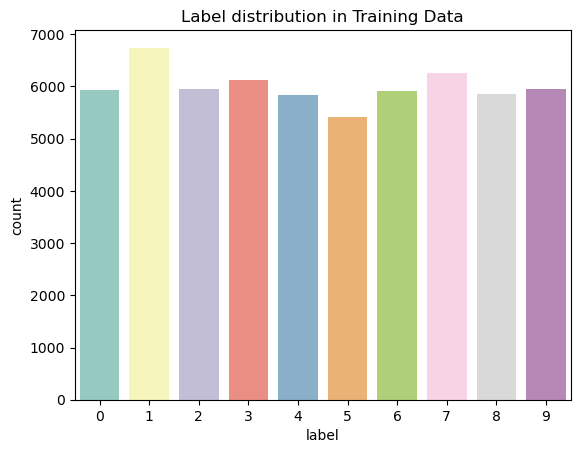

In [8]:
sns.countplot(x="label", data=mnist_train, palette="Set3").set(
    title="Label distribution in Training Data")

/tmp/ipykernel_5770/1845494732.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=mnist_test, palette="Set2").set(


[Text(0.5, 1.0, 'Label distribution in Test Data')]

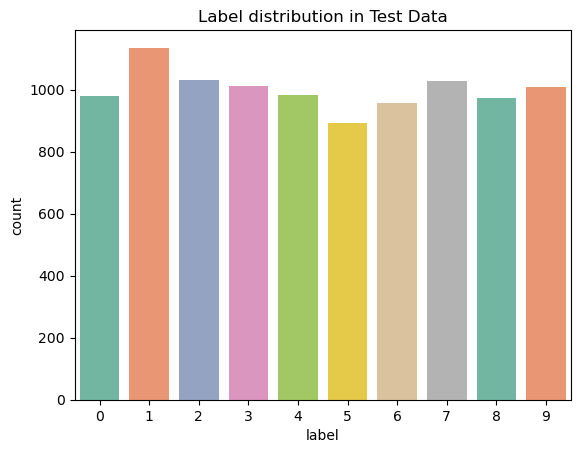

In [9]:
sns.countplot(x="label", data=mnist_test, palette="Set2").set(
    title="Label distribution in Test Data")

There is no imbalance in the dataset wrt the distribution of different classes.

/tmp/ipykernel_5770/1533433506.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axes[i].set_title(str(int(pixel_data[-1])), color= 'black', fontsize=20)


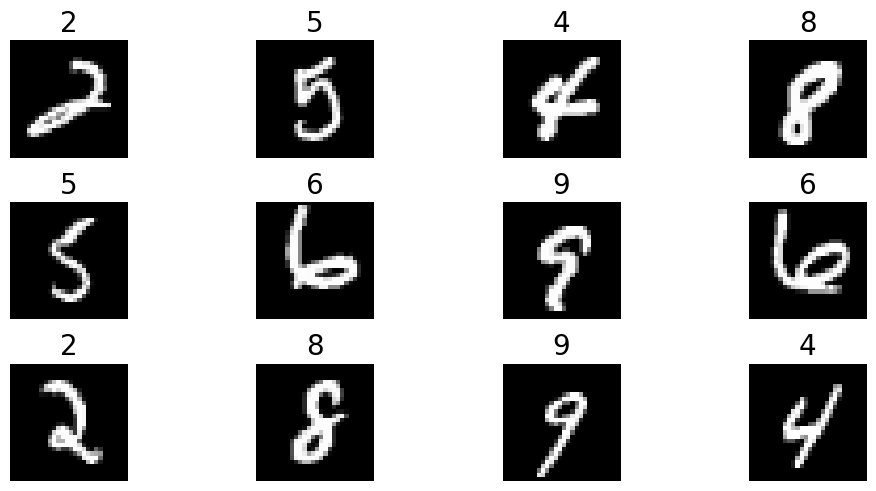

In [10]:
fig, axes = plt.subplots(3,4, figsize=(10,5))

fig.tight_layout()
axes = axes.flatten()

idx = np.random.randint(0,mnist_train.shape[0],size=12)
for i in range(12):

    pixel_data = mnist_train.iloc[idx[i]]

    axes[i].imshow(np.array(pixel_data[:784]).reshape(28,28), cmap='gray')
    axes[i].axis('off') 

    axes[i].set_title(str(int(pixel_data[-1])), color= 'black', fontsize=20)
    

In [11]:
import xgboost as xb

<h3> Models <h/3>
    <h4> XGBOOST </h4>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train, 
                                                  test_size=0.1)


xgb_train_matrix = xb.DMatrix(x_train.reshape(x_train.shape[0], 
                                    x_train.shape[1] * x_train.shape[2]), 
                              label=y_train)

xgb_val_matrix = xb.DMatrix(x_val.reshape(x_val.shape[0], 
                                    x_val.shape[1] * x_val.shape[2]), 
                              label=y_val)

xgb_test_matrix = xb.DMatrix(x_test.reshape(x_test.shape[0], 
                                    x_test.shape[1] * x_test.shape[2]), 
                              label=y_test)


params = {
    'max_depth': 10,                
    'eta': 0.7,                     
    'objective': 'multi:softmax',   
    'num_class': 10,                
    'eval_metric': ['merror' ,      
                    'mlogloss']     
}  

results = {}

In [13]:
xgb_model = xb.train(params, xgb_train_matrix, evals=[(xgb_train_matrix, 'train'),
                                                      (xgb_val_matrix, 'val')],
                     num_boost_round=10,
                     evals_result = results,
                     verbose_eval=True)

y_pred = xgb_model.predict(xgb_test_matrix)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	train-merror:0.05807	train-mlogloss:0.43642	val-merror:0.11450	val-mlogloss:0.57052
[1]	train-merror:0.02283	train-mlogloss:0.23440	val-merror:0.08350	val-mlogloss:0.40005
[2]	train-merror:0.01317	train-mlogloss:0.13734	val-merror:0.07117	val-mlogloss:0.31051
[3]	train-merror:0.00754	train-mlogloss:0.08202	val-merror:0.06150	val-mlogloss:0.25262
[4]	train-merror:0.00381	train-mlogloss:0.05054	val-merror:0.05983	val-mlogloss:0.21625
[5]	train-merror:0.00178	train-mlogloss:0.03227	val-merror:0.05417	val-mlogloss:0.19071
[6]	train-merror:0.00072	train-mlogloss:0.02159	val-merror:0.05017	val-mlogloss:0.17450
[7]	train-merror:0.00033	train-mlogloss:0.01507	val-merror:0.04817	val-mlogloss:0.16230
[8]	train-merror:0.00020	train-mlogloss:0.01081	val-merror:0.04483	val-mlogloss:0.15238
[9]	train-merror:0.00006	train-mlogloss:0.00816	val-merror:0.04283	val-mlogloss:0.14430
Accuracy: 96.24%


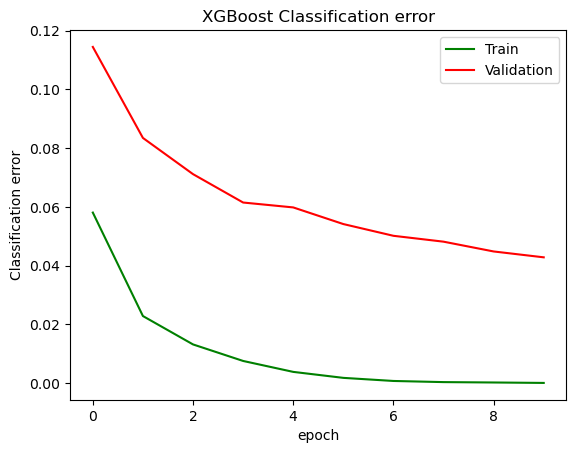

In [14]:
epochs = range(len(results['train']['merror']))
plt.plot(epochs,results['train']['merror'], color='green', label='Train' )
plt.plot(epochs,results['val']['merror'], color='red', label='Validation' )
plt.title('XGBoost Classification error')
plt.xlabel('epoch')
plt.ylabel('Classification error')
plt.legend()
plt.show()

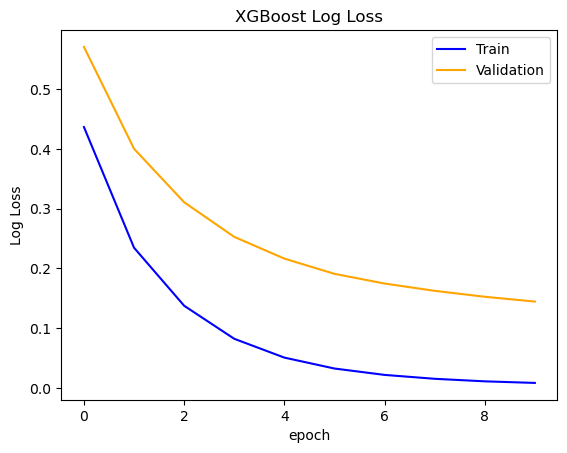

In [15]:
plt.plot(epochs,results['train']['mlogloss'], color='blue', label='Train' )
plt.plot(epochs,results['val']['mlogloss'], color='orange', label='Validation' )
plt.title('XGBoost Log Loss')
plt.xlabel('epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

<h4> CNN </h4>

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

x_train = torch.tensor(x_train).unsqueeze(1).float().to(device) / 255.0  # Adding channel dimension for grayscale
x_test = torch.tensor(x_test).unsqueeze(1).float().to(device) / 255.0
x_val = torch.tensor(x_val).unsqueeze(1).float().to(device) / 255.0


class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm2d(20)
        self.dropout1 = nn.Dropout(0.2)

        self.conv2 = nn.Conv2d(in_channels=20, out_channels=20, kernel_size=4, padding=2)
        self.bn2 = nn.BatchNorm2d(20)
        self.dropout2 = nn.Dropout(0.2)

        self.conv3 = nn.Conv2d(in_channels=20, out_channels=20, kernel_size=4, padding=2)
        self.bn3 = nn.BatchNorm2d(20)
        self.dropout3 = nn.Dropout(0.2)

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(18000, 200)  # Adjust this based on your flattened output size
        self.fc2 = nn.Linear(200, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.dropout1(x)
        
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.dropout2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.dropout3(x)

        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

cnn_model = CNNModel().to(device)  # Move model to GPU

optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-4)

print(cnn_model)


Using device: cuda


/tmp/ipykernel_5770/2746231125.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train).unsqueeze(1).float().to(device) / 255.0  # Adding channel dimension for grayscale


CNNModel(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (bn1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (conv2): Conv2d(20, 20, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (bn2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.2, inplace=False)
  (conv3): Conv2d(20, 20, kernel_size=(4, 4), stride=(1, 1), padding=(2, 2))
  (bn3): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=18000, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=10, bias=True)
)


/tmp/ipykernel_5770/2746231125.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test = torch.tensor(x_test).unsqueeze(1).float().to(device) / 255.0
/tmp/ipykernel_5770/2746231125.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val = torch.tensor(x_val).unsqueeze(1).float().to(device) / 255.0


In [18]:
x_train.shape

torch.Size([54000, 1, 28, 28])

In [19]:
from torch.utils.data import DataLoader, TensorDataset

y_train = torch.tensor(y_train, dtype=torch.long).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)
y_val = torch.tensor(y_val, dtype=torch.long).to(device)

train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)
test_dataset = TensorDataset(x_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

criterion = nn.CrossEntropyLoss()  # Loss function
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-4)  # Optimizer

# Calculate accuracy
def calculate_accuracy(y_pred, y_true):
    _, predicted = torch.max(y_pred, 1)
    correct = (predicted == y_true).sum().item()
    return correct / len(y_true)

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        train_loss = 0.0
        train_correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            optimizer.zero_grad()  # Zero out gradients from previous batch
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights
            
            train_loss += loss.item()
            train_correct += calculate_accuracy(outputs, labels) * len(labels)
            total += len(labels)
        
        avg_train_loss = train_loss / len(train_loader)
        avg_train_acc = train_correct / total
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        total_val = 0
        
        with torch.no_grad():  # No gradients needed during evaluation
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                val_correct += calculate_accuracy(outputs, labels) * len(labels)
                total_val += len(labels)
        
        avg_val_loss = val_loss / len(val_loader)
        avg_val_acc = val_correct / total_val
        
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}, Val Loss: {avg_val_loss:.4f}, Val Acc: {avg_val_acc:.4f}")

train_model(cnn_model, train_loader, val_loader, criterion, optimizer, epochs=10)

# Model evaluation
def evaluate_model(model, test_loader, criterion):
    model.eval()
    test_loss = 0.0
    test_correct = 0
    total_test = 0
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to GPU
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            test_loss += loss.item()
            test_correct += calculate_accuracy(outputs, labels) * len(labels)
            total_test += len(labels)
    
    avg_test_loss = test_loss / len(test_loader)
    avg_test_acc = test_correct / total_test
    return avg_test_loss, avg_test_acc

# Get test accuracy
test_loss, test_acc = evaluate_model(cnn_model, test_loader, criterion)
print(f"Accuracy on test data is: {test_acc * 100:.2f}%")

/tmp/ipykernel_5770/2852504801.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long).to(device)
/tmp/ipykernel_5770/2852504801.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long).to(device)
/tmp/ipykernel_5770/2852504801.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_val = torch.tensor(y_val, dtype=torch.long).to(device)


Epoch [1/10], Train Loss: 0.1360, Train Acc: 0.9601, Val Loss: 0.0740, Val Acc: 0.9775
Epoch [2/10], Train Loss: 0.0538, Train Acc: 0.9832, Val Loss: 0.0644, Val Acc: 0.9803
Epoch [3/10], Train Loss: 0.0417, Train Acc: 0.9866, Val Loss: 0.0492, Val Acc: 0.9867
Epoch [4/10], Train Loss: 0.0343, Train Acc: 0.9896, Val Loss: 0.0500, Val Acc: 0.9847
Epoch [5/10], Train Loss: 0.0304, Train Acc: 0.9900, Val Loss: 0.0487, Val Acc: 0.9848
Epoch [6/10], Train Loss: 0.0275, Train Acc: 0.9909, Val Loss: 0.0421, Val Acc: 0.9868
Epoch [7/10], Train Loss: 0.0234, Train Acc: 0.9923, Val Loss: 0.0598, Val Acc: 0.9848
Epoch [8/10], Train Loss: 0.0202, Train Acc: 0.9932, Val Loss: 0.0518, Val Acc: 0.9852
Epoch [9/10], Train Loss: 0.0192, Train Acc: 0.9937, Val Loss: 0.0562, Val Acc: 0.9838
Epoch [10/10], Train Loss: 0.0182, Train Acc: 0.9941, Val Loss: 0.0480, Val Acc: 0.9875
Accuracy on test data is: 98.89%


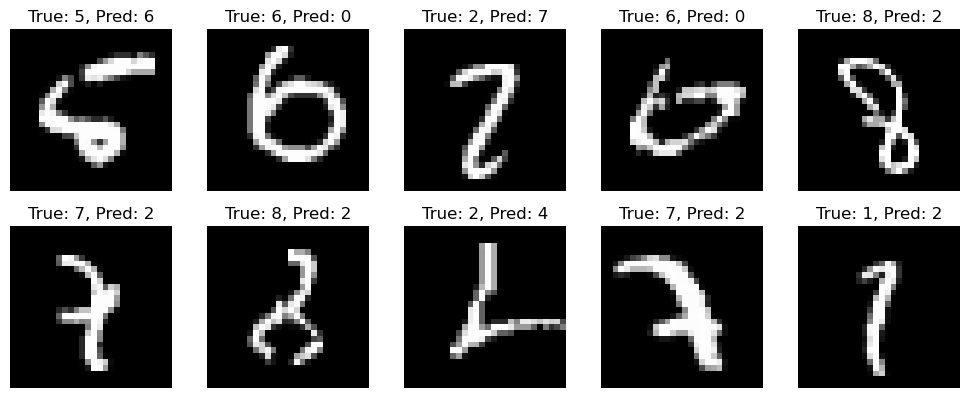

In [21]:
import matplotlib.pyplot as plt

cnn_model.eval()  

y_test_pred = []
with torch.no_grad():
    for inputs in test_loader:
        inputs = inputs[0].to(device) 
        outputs = cnn_model(inputs)
        _, predicted = torch.max(outputs, 1)  
        y_test_pred.append(predicted.cpu())  

y_test_pred = torch.cat(y_test_pred).numpy()

misclassified_indices = np.where(y_test_pred != y_test.cpu().numpy())[0]

def plot_misclassified_examples(x_test, y_test, y_test_pred, misclassified_indices, num_examples=10):
    plt.figure(figsize=(10, 10))
    
    for i, idx in enumerate(misclassified_indices[:num_examples]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_test[idx].squeeze(), cmap='gray')
        plt.title(f"True: {y_test[idx]}, Pred: {y_test_pred[idx]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

plot_misclassified_examples(x_test.cpu().numpy(), y_test.cpu().numpy(), y_test_pred, misclassified_indices)


In [22]:
misclassified_indices

array([   8,  259,  321,  445,  543,  551,  582,  646,  684,  716,  938,
        947,  956, 1014, 1136, 1182, 1226, 1232, 1242, 1247, 1319, 1403,
       1522, 1530, 1709, 1717, 1754, 1773, 1822, 1882, 1903, 2018, 2035,
       2107, 2130, 2182, 2225, 2266, 2293, 2343, 2447, 2454, 2597, 2598,
       2654, 2896, 2921, 2953, 3023, 3073, 3225, 3330, 3412, 3422, 3457,
       3475, 3520, 3534, 3601, 3727, 3794, 3808, 3850, 3906, 4065, 4159,
       4289, 4308, 4369, 4497, 4507, 4536, 4563, 4639, 4674, 4712, 4740,
       4807, 4860, 4956, 5331, 5457, 5642, 5654, 5887, 5937, 6571, 6576,
       6597, 6625, 6755, 6783, 6847, 6883, 7839, 7847, 7856, 7899, 7928,
       8128, 8316, 8326, 8408, 9009, 9015, 9051, 9505, 9599, 9664, 9729,
       9839])

## Adversarial Attack

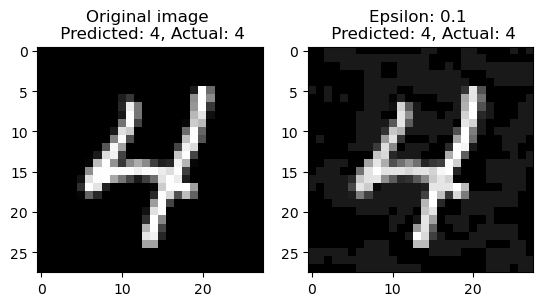

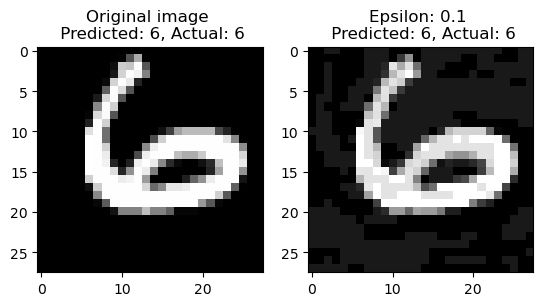

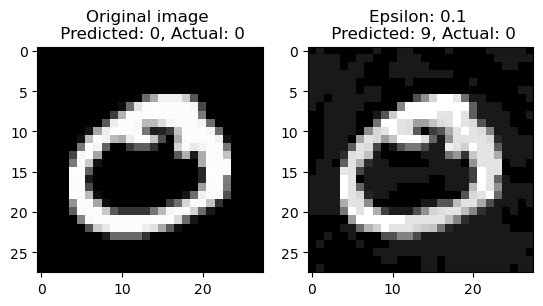

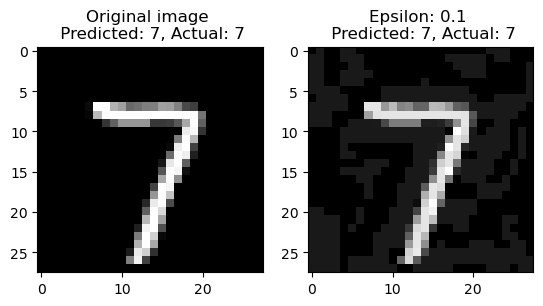

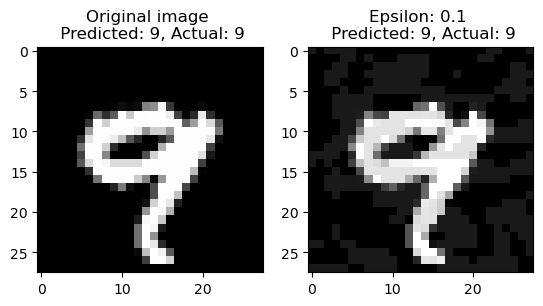

In [23]:
import torch.nn.functional as F

def get_correctly_classified_examples(model, test_loader, device):
    model.eval()  
    correctly_classified_indices = []
    x_test_correctly_classified = []
    y_test_correctly_classified = []
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct = (predicted == labels).cpu().numpy()

            for j in range(len(inputs)):
                if correct[j]:
                    correctly_classified_indices.append(i * test_loader.batch_size + j)
                    x_test_correctly_classified.append(inputs[j].cpu().numpy())
                    y_test_correctly_classified.append(labels[j].cpu().numpy())

    return correctly_classified_indices, np.array(x_test_correctly_classified), np.array(y_test_correctly_classified)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
correctly_classified_indices, x_test_correctly_classified, y_test_correctly_classified = get_correctly_classified_examples(cnn_model, test_loader, device)

def FGSM(model, image, label, eps):
    image.requires_grad = True  

    # Forward pass
    output = model(image)
    loss = F.cross_entropy(output, label)
    model.zero_grad()
    loss.backward()
    gradient = image.grad.data
    signed_grad = gradient.sign()

    adversary = image + eps * signed_grad
    adversary = torch.clamp(adversary, 0, 1)  
    return adversary

for i in random.sample(range(0, x_test_correctly_classified.shape[0]), 5):
    image = torch.tensor(x_test_correctly_classified[i]).unsqueeze(0).to(device)  
    label = torch.tensor(y_test_correctly_classified[i]).unsqueeze(0).to(device)

    eps = 0.1
    perturbed_image = FGSM(cnn_model, image, label, eps).detach().cpu().numpy()

    with torch.no_grad():
        predicted_label = torch.argmax(cnn_model(torch.tensor(perturbed_image).to(device))).item()
        actual_label = label.item()

    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title(f"Original image \n Predicted: {actual_label}, Actual: {actual_label}")
    plt.imshow(image.squeeze().detach().cpu().numpy(), cmap="gray")

    plt.subplot(1, 2, 2)
    plt.title(f"Epsilon: {eps} \n Predicted: {predicted_label}, Actual: {actual_label}")
    plt.imshow(perturbed_image.squeeze(), cmap="gray")

    plt.show()


In [24]:
xgb_pred = xgb_model.predict(xb.DMatrix(perturbed_image.reshape(1,28*28)))
print("Actual label : {} , Predicted by XGboost : {}".format(actual_label,xgb_pred[0]))

Actual label : 9 , Predicted by XGboost : 7.0


## Deepfool Attack 

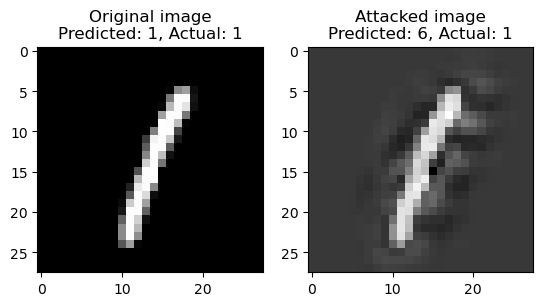

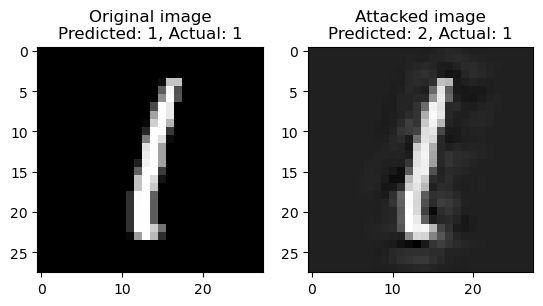

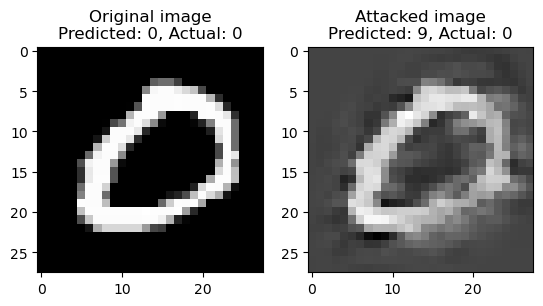

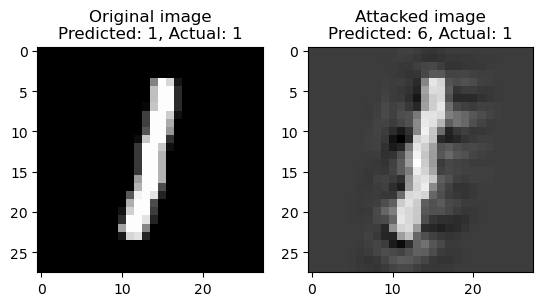

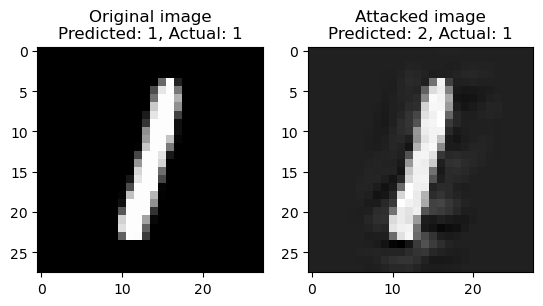

In [25]:
def DeepFool(image, model, num_classes=10, max_iter=50):
    device = image.device
    image = image.clone().detach().requires_grad_(True)
    adversary = image.clone().detach()
    w = torch.zeros_like(image).to(device)
    r_tot = torch.zeros_like(image).to(device)
    
    fs = model(image)
    _, label_list = torch.sort(fs, descending=True)
    actual_label = label_list[0, 0].item()
    
    iteration = 0
    k_i = actual_label
    
    while k_i == actual_label and iteration < max_iter:
        pert = float('inf')
        
        fs = model(image)
        grad_orig = torch.autograd.grad(fs[0, actual_label], image, retain_graph=True)[0]
        
        for k in range(1, num_classes):
            cur_grad = torch.autograd.grad(fs[0, label_list[0, k]], image, retain_graph=True)[0]
            w_k = cur_grad - grad_orig
            f_k = (fs[0, label_list[0, k]] - fs[0, actual_label]).item()
            
            pert_k = abs(f_k) / torch.norm(w_k.view(-1))
            
            if pert_k < pert:
                pert = pert_k
                w = w_k
        
        r_i = pert * w / torch.norm(w.view(-1))
        r_tot = r_tot + r_i
        adversary = image + r_tot
        image = adversary.clone().detach().requires_grad_(True)
        
        fs = model(image)
        k_i = torch.argmax(fs).item()
        
        iteration += 1

    return k_i, adversary.detach()

for i in random.sample(range(0, x_test_correctly_classified.shape[0]), 5):
    image = torch.tensor(x_test_correctly_classified[i]).unsqueeze(0).to(device)

    with torch.no_grad():
        label = cnn_model(image)
    actual_label = torch.argmax(label).item()

    label_pert, pert_image = DeepFool(image, cnn_model)
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.title(f"Original image\nPredicted: {actual_label}, Actual: {actual_label}")
    plt.imshow(image.squeeze().cpu().numpy(), cmap="gray")
    
    plt.subplot(1, 2, 2)
    plt.title(f"Attacked image\nPredicted: {label_pert}, Actual: {actual_label}")
    plt.imshow(pert_image.squeeze().cpu().numpy(), cmap="gray")
    
    plt.show()

In [26]:
xgb_pred = xgb_model.predict(xb.DMatrix(np.reshape(pert_image.cpu(),(1,28*28))))
print("Actual label : {} , Predicted by XGboost : {}".format(actual_label,xgb_pred[0]))

Actual label : 1 , Predicted by XGboost : 1.0
